In [1]:
import warnings
warnings.simplefilter("ignore")

# 나이브 베이즈 분류 모형

## 나이브 가정

독립 변수 $x$가 다차원이면 즉, $x = (x_1, \ldots, x_D)$이면 likelihood $P(x \mid y = C_k)$로 모든 $x=(x_1, \ldots, x_D)$에 대한 결합 확률(joint probability) $P(x_1, \ldots, x_D \mid y = C_k)$ 을 사용해야 한다. 그러나 차원이 높아질 수록 이러한 다차원 결합 확률은 실제로 구하기 어렵기 때문에 모든 차원의 개별 독립 변수 요소들이 서로 조건부 독립(conditional independent)이라는 가정을 흔히 사용한다. 공분산이 0이 아닌데도 다 0이라고 가정하는 것이다. 이러한 가정을 베이즈 분류 모형에 적용한 모형을 **나이브 베이즈 분류 모형(Naive Bayes classification model)**이라고 한다.

**나이브 베이즈 분류 모형에서는 $x$ 벡터의 결합 확률이 개별 원소 $x_d$의 확률의 곱**으로 나타난다.

$$
P(x_1, \ldots, x_D \mid y = C_k) = \prod_{d=1}^D P(x_d \mid y = C_k)
$$

$$
P(y = C_k \mid x) \;\; \propto \;\; \prod_{d=1}^D P(x_{d} \mid y = C_k)\; P(y = C_k)
$$

$x$에 대해서는 모든 분포가 가능하지만 scikit-learn에서는 가우시안, 베르누이, 다항분포일 경우만 제공한다. 

$**$ 조건부 독립 : $y$가 $k$번째 클래스에 한해서만 독립이다.

$**$ 무조건부 독립 : $y$가 증가하면 $x_1$도 증가할 수 있다. 클래스에 상관없이 x값끼리 독립이다.?

## 가우시안 정규 분포 Likelihood 모형

$x$ 벡터의 원소가 모두 실수이고 클래스마다 특정한 값 주변에서 발생한다고 하면 가우시안 정규 분포 likelihood 모형을 사용한다.
각 독립 변수 $x_d$마다, 그리고 클래스 $k$마다 정규 분포의 기댓값 $\mu_{d,k}$, 표준 편차 $\sigma_{d,k}^2$가 달라진다. QDA 모형과는 달리 모든 독립 변수들이 서로 조건부 독립이라고 가정한다.

$$ P(x_d \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_{d,k}^2}} \exp \left(-\dfrac{(x_d-\mu_{d,k})^2}{2\sigma_{d,k}^2}\right) $$
  

## 베르누이 분포 Likelihood 모형

종속변수와 독립변수가 0,1 값만 있을 때 사용가능하다.

베르누이 분포 Likelihood 모형에서는 각각의 $x = (x_1,\ldots, x_D)$의 각 원소 $x_d$가 0 또는 1이라는 값만을 가질 수 있다. 즉 독립 변수는 $D$개의 독립적인 베르누이 확률 변수, 즉 동전으로 구성된 동전 세트로 표현할 수 있다. 이 동전들의 모수 $\theta_{d}$는 동전 $d$마다 다르다.

그런데 클래스 $y = C_k$ $(k=1,\ldots,K)$마다도 $x_d$가 1이 될 확률이 다르다. 즉, **동전의 모수 $\theta_{d,k}$는 동전 $d$마다 다르고 클래스 $k$마다도 다르다. 즉, 전체 $D \times K$의 동전이 존재하며 같은 클래스에 속하는 $D$개의 동전이 하나의 동전 세트를 구성하고 이러한 동전 세트가 $K$개 있다고 생각할 수 있다.**

$$ P(x_d \mid y = C_k) = \theta_{d,k}^x (1-\theta_{d,k})^{(1-x_d)} $$

이러한 동전 세트마다 확률 특성이 다르므로 베르누이 분포 Likelihood 모형을 기반으로 하는 나이브 베이즈 모형은 동전 세트를 $N$번 던진 결과로부터 $1,\ldots,K$ 중 어느 동전 세트를 던졌는지를 찾아내는 모형이라고 할 수 있다.

## 다항 분포 Likelihood 모형

변수간 상대적인 비율이 중요한 경우에 사용하고, $x$값이 실수여도 가능하다. 

다항 분포 모형에서는 $x$ 벡터가 다항 확률 분포의 샘플이라고 가정한다. 즉, $D$개의 면을 가지는 주사위를 $\sum_{d=1}^D x_d$번 던져서 나온 결과로 본다.
예를 들어 $x$가 다음과 같다면,

$$ x = (1, 4, 0, 5) $$

4면체 주사위를 10번 던져서 1인 면이 1번, 2인 면이 4번, 4인 면이 5번 나온 결과로 해석한다. $x_1, ~, x_d$를 하나의 차원인 것으로 취급한다. 각각의 주사위 면이 독립이지만 앞의 모형들과 다른 건 하나로 묶어서 생각한다는 점이다. 

각 클래스마다 주사위가 다르다고 가정하므로 $K$개의 클래스를 구분하는 문제에서는 $D$개의 면을 가진 주사위가  $K$개 있다고 본다. 

$$ P(x_1, \ldots, x_D \mid y = C_k) = \prod_{d=1}^D \theta_{d,k}^{x_d}$$

$$ \sum_{d=1}^{D} \theta_{d,k} = 1 $$

따라서 다항 분포 Likelihood 모형을 기반으로 하는 나이브 베이즈 모형은 주사위를 던진 결과로부터  $1,\ldots,K$ 중 어느 주사위를 던졌는지를 찾아내는 모형이라고 할 수 있다.

## Scikit-Learn에서 제공하는 나이브 베이즈 모형

Scikit-Learn의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브 베이즈 모형 클래스를 제공한다.

* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이 분포 나이브 베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항 분포 나이브 베이즈
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	가우시안 정규 분포 나이브 베이즈

이 클래스들은 다음과 같은 속성값 및 메서드를 가진다.

### 사전 확률과 관련된 속성

* `classes_`

 * 종속 변수 Y의 클래스(라벨)


* `class_count_`

 * 종속 변수 Y의 값이 특정한 클래스인 표본 데이터의 수(사전확률 계산할 때 사용됨)


* `class_prior_`

 * 종속 변수 Y의 무조건부 확률 분포 $ P(Y) $ (가우시안 정규 분포의 경우에만) => **사전확률**
 * $x$가 없을 때 $y$의 클래스로 확률을 예측하는 것
 

* `class_log_prior_`

 * 종속 변수 Y의 무조건부 확률 분포의 로그 $ \log P(Y) $ (베르누이 분포나 다항 분포의 경우에만) => **log(사전확률)**
 

### Likelihood 추정 속성


* `theta_ `, `sigma_` 

 * 가우시안 정규 분포의 기댓값 $\mu$ 과 분산 $\sigma^2$ (가우시안 정규 분포의 경우에만) : matrix 형태($k$번째 클래스에서 각각 $x$의 평균과 분산, 즉 모든 클래스에서 모든 $x$ 차원에 대해 $P$를 구함
 
* `feature_count_`
 * 베르누이 분포에서는 각각의 클래스 $k$에 대해 $d$번째 동전이 앞면이 나온 횟수 $N_{d,k}$을 저장한 행렬
 * 다항 분포에서는 각각의 클래스 $k$에서 $d$번째 면이 나온 횟수 $N_{d,k}$을 저장한 행렬

* `feature_log_prob_ `

 * 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그값
 * 각 $y$ 클래스와 $x$차원에 해당하는 데이터가 나올 확률
 
 $$ \log \theta_k = (\log \theta_{1,k}, \ldots, \log \theta_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$
 
여기에서 $N_k$은 클래스 $k$에 대해 $D$번째 동전을 던진 총 횟수(베르누이 분포의 경우) 또는 주사위를 던진 총 횟수(다항 분포의 경우)이고, $N_{D, k}$는 클래스 $k$에 대해 $D$번째 동전을 던져 앞면이 나온 횟수(베르누이 분포의 경우) 또는 주사위를 던져 $D$번째 면이 나온 횟수(다항 분포의 경우)이다.

표본 데이터의 수가 적은 경우에는 모수에 대해 다음처럼 스무딩(smoothing)을 할 수도 있다.

### 스무딩

표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수도 있다. 하지만 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 따라서 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다. 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 가까운 다음과 값으로 변한다. 이를 라플라스 스무딩(Laplace smoothing) 또는 Add-One 스무딩이라고 한다.
만약 카테고리의 수가 2개가 아니라 $D$개이면 각각의 카테고리 값이 나오는 $D$개의 가상 표본 데이터를 추가한다.

 $$ \hat{\theta}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + \alpha D} $$ 

또 가상 표본 데이터를 추가할 때 가중치 $\alpha$를 사용하여 스무딩의 정도를 조절할 수도 있다.

## 가우시안 정규 분포 나이브 베이즈 모형

먼저 실수인 두 개의 독립 변수 $x_1, x_2$와 두 종류의 클래스 $y=0,1$을 가지는 분류 모형을 생각하자. 독립 변수는 $y$의 클래스에 따라 다음처럼 분포가 달라진다. $\mu_0, \sigma_0$은 $y$클래스가 0일 때 $x_1, x_2$의 평균벡터, 공분산벡터이고, $\mu_1, \sigma_1$은 $y$클래스가 1일 때 $x_1, x_2$의 평균벡터, 공분산벡터이다. 여기에서 나이브 베이즈 모형은 0.9와 -0.8이 0이라고 가정해서, [[1, 2], [1.2, 2]]와 같은 형태로 근접한 값이 추출될 것이다.

$$ 
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix} 
$$
$$ 
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix} 
$$


In [10]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

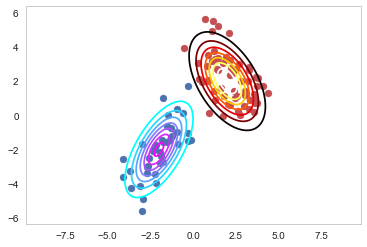

In [12]:
%matplotlib inline
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

이 데이터를 가우시안 나이브 베이즈 모형으로 다음처럼 풀 수 있다. 실제 데이터는 위 그래프 모양이지만 아래 그림으로 데이터가 분포해 있다고 가정하고 푼다.

In [13]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

y 클래스의 종류와 각 클래스에 속하는 샘플의 수, 그리고 그 값으로부터 구한 사전 확률의 값은 다음과 같다.

In [14]:
model_norm.classes_

array([0., 1.])

In [15]:
model_norm.class_count_

array([40., 60.])

In [16]:
model_norm.class_prior_

array([0.4, 0.6])

각 클래스에 따라 $x$가 이루는 확률 분포의 모수를 계산하면 다음과 같다.

In [17]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [18]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

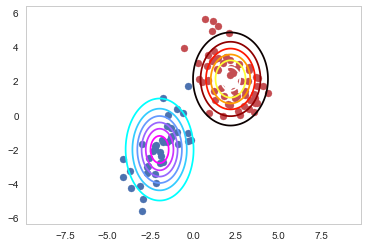

In [19]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

이 모형을 사용해보자. 각 클래스값이 나올 확률은 `predict_proba` 메서드로 구할 수 있다. 결과는 y=0일 확률이 0.98, y=1일 확률이 0.02이다.

In [20]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

이 값이 나오게 된 중간 과정을 살펴보자. 우선 추정된 독립 변수의 모수와 정규 분포의 확률 밀도 함수를 사용하여 likelihood를 구할 수 있다.
나이브 베이즈 가정에 따라 두 입력 변수의 곱을 결합 확률로 계산한다.

In [21]:
# 각 클래스에서 두 변수가 독립이므로 x1과 x2의 pdf값을 곱해주면(prod()) 각 클래스의
# likelihood가 나온다
likelihood = [
    sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
    sp.stats.norm(model_norm.theta_[1], np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod()]
likelihood

[0.0346968402917242, 0.0003999540815189114]

여기에 사전 확률을 곱하면 사후 확률에 비례하는 값이 나온다. 아직 정규화 상수로 나누어주지 않았으므로 두 값의 합이 1이 아니다. 즉, 확률이라고 부를 수는 없다. 하지만 크기를 비교하면 y=0일 확률이 y=1일 확률보다 훨씬 크다는 것을 알 수 있다.

In [13]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.01387874, 0.00023997])

이 값을 정규화하면 `predict_proba` 메서드로 구한 것과 같은 값이 나온다.

In [14]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

#### 연습 문제 1

붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.

* confusion matrix
* classification report
* ROC curve
* AUC

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_raw = iris.data

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_norm = GaussianNB().fit(iris_raw, iris.target)
predict_norm = model_norm.predict(iris_raw)
print(confusion_matrix(iris.target, predict_norm))
print(classification_report(iris.target, predict_norm))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



## 베르누이 분포 나이브 베이즈 모형

베르누이 나이브 베이즈 모형에서는 타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야 한다. 예를 들어 전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률 변수로 모형화할 수 있으므로 스팸 필터링에 사용할 수 있다.

In [25]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [26]:
X

array([[0, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 0]])

In [27]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

이 데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 예를 들어 첫번째 메일은 정상 메일이고 1번, 4번 키워드는 포함하지 않지만 2번, 3번 키워드를 포함한다고 볼 수 있다. 정리하여 표로 만들면 다음과 같다. 아래 표에서 2번 키워드는 1로 정상메일에 꼭 들어간다는 의미지만 데이터 수가 적어서 신뢰할 수 없으므로 fair coin과 혼합하여 모수를 산정한다(smoothing). 즉, 각 성분의 분모에 2, 분자에 1을 더해준다. 정상메일의 첫번째 키워드의 모수($\theta$)는 $\frac{2+1}{4+2}$가 되고, 다른 성분에도 동일하게 적용된다.

|| $x_1$ | $x_2$ | $x_3$ | $x_4$ |
|-| - | -| -| -|
|$y_0$(정상메일)| $\frac{2}{4}$ | $\frac{4}{4}$ | $\frac{3}{4}$ | $\frac{1}{4}$ |
|$y_1$(스팸메일)| $\frac{2}{6}$ | $\frac{3}{6}$ | $\frac{5}{6}$ | $\frac{3}{6}$ |


이 데이터를 베르누이 나이브 베이즈 모형으로 예측해 보자.

In [28]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

y 클래스의 종류와 각 클래스에 속하는 샘플의 수, 그리고 그 값으로부터 구한 사전 확률의 값은 다음과 같다.

In [29]:
model_bern.classes_

array([0, 1])

In [30]:
model_bern.class_count_

array([4., 6.])

In [31]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

각 클래스 $k$ 별로, 그리고 각 독립 변수 $d$ 별로, 각각 다른 베르누이 확률 변수라고 가정하여 모두 8개의 베르누이 확률 변수의 모수를 구하면 다음과 같다.

In [32]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [33]:
np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[4., 4., 4., 4.],
       [6., 6., 6., 6.]])

In [34]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

그런데 이 값은 모형 내에서 구한 값과 다르다. 모형 내에서 스무딩(smoothing)이 이루어지기 때문이다. 스무딩은 동전의 각 면 즉, 0과 1이 나오는 가상의 데이터를 추가함으로서 추정한 모수의 값이 좀 더 0.5에 가까워지도록 하는 방법이다. 이 때 사용한 스무딩 가중치 값은 다음처럼 확인할 수 있다.

In [24]:
model_bern.alpha

1.0

스무딩이 적용된 베르누이 모수값은 다음과 같다.

In [25]:
# 스무딩 가중치가 베르누이에서 1.0이면 fair coin이기 때문에
#각 성분의 확률이 0.5에 가까워진다.
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

이에 모형이 완성되었으니 테스트 데이터를 사용하여 예측을 해 본다. 예를 들어 1번, 2번 키워드를 포함한 메일이 정상 메일인지 스팸 메일인지 알아보자.

In [26]:
x_new = np.array([1, 1, 0, 0])

In [27]:
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

위 결과에서 정상 메일일 가능성이 약 3배임을 알 수 있다. 이 값은 다음처럼 구할 수도 있다.

In [28]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.72480181, 0.27519819])

반대로 3번, 4번 키워드가 포함된 메일은 스팸일 가능성이 약 90%이다.

In [29]:
x_new = np.array([0, 0, 1, 1])

In [30]:
model_bern.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

In [31]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    *np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.09530901, 0.90469099])

#### 연습 문제 2

1. MNIST Digit 분류 문제에서 `sklearn.preprocessing.Binarizer`로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.
2. `BernoulliNB` 클래스의 `binarize` 인수를 사용하여 같은 문제를 풀어본다.
3. 계산된 모형의 모수 벡터 값을 각 클래스별로 8*8 이미지의 형태로 나타낸다. 이 이미지는 무엇을 뜻하는가?


In [7]:
from sklearn.preprocessing import Binarizer
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata("MNIST original")
#y = Binarizer(threshold=8).fit()
minist

ConnectionAbortedError: [WinError 10053] 현재 연결은 사용자의 호스트 시스템의 소프트웨어의 의해 중단되었습니다

## 다항 분포 나이브 베이즈 모형

이번에는 다항 분포 나이브 베이즈 모형에 대해 알아보자. 앞서와 같이 스팸 메일 필터링을 예로 든다. 다만 이번에는 BOW 인코딩을 할 때, 각 키워드가 출현한 빈도를 직접 입력 변수로 사용한다. 다항분포 나이브 베이즈 모형은 텍스트가 나온 횟수를 세서 인코딩할 때 주로 사용한다.

In [36]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4)
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [37]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

사전 확률은 다음과 같이 구한다.

In [38]:
model_mult.classes_

array([0, 1])

In [39]:
model_mult.class_count_

array([4., 6.])

In [40]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

다음으로 각 클래스에 대한 likelihood 모형을 구한다. 다항 분포 모형을 사용하므로 각 클래스틑 4개의 면을 가진 주사위로 생각할 수 있다. 그리고 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나누면 된다. 우선 각 클래스 별로 각각의 면이 나온 횟수는 다음과 같다. 

In [41]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

이 데이터에서 클래스 Y=0인 주사위를 던진 횟수는 첫번째 행의 값의 합인 40이므로 클래스 Y=0인 주사위를 던져 1이라는 면이 나올 확률은 다음처럼 계산할 수 있다.

$$ \theta_{1,Y=0} = \dfrac{12}{40} = 0.3 $$

In [42]:
np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[40., 40., 40., 40.],
       [48., 48., 48., 48.]])

In [43]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

실제로는 극단적인 추정을 피하기 위해 이 값을 가중치 1인 스무딩을 한 추정값을 사용한다.

In [44]:
model_mult.alpha

1.0

In [45]:
# x가 4차원의 4면체 주사위 이므로 각 성분의 분모에 4를 더해주고
# 분자에는 1을 더해준다.
(fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

이렇게 구한 모수 추정치는 다음과 같다.

In [46]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

이제 이 값을 사용하여 예측을 해 보자. 만약 어떤 메일에 1번부터 4번까지의 키워드가 각각 10번씩 나왔다면 다음처럼 확률을 구할 수 있다. 구해진 확률로부터 이 메일이 스팸임을 알 수 있다. 

In [52]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

다항 분포의 확률 밀도 공식을 사용하면 다음처럼 직접 확률을 구할 수도 있다.

In [48]:
p = (theta ** x_new).prod(axis=1)*np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

#### 연습 문제 3

MNIST Digit 분류 문제를 다항분포 나이브 베이즈 모형을 사용하여 풀고 Binarizing을 하여 베르누이 나이브 베이즈 모형을 적용했을 경우와 성능을 비교하라.


#### 연습 문제 4

텍스트 분석에서 TF-IDF 인코딩을 하면 단어의 빈도수가 정수가 아닌 실수값이 된다. 이런 경우에도  다항분포 모형을 적용할 수 있는가?


## 뉴스 그룹 분류

다음은 20 News Group 데이터에 대해 나이브 베이즈 분류 모형을 적용한 결과이다. 

In [47]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('model', MultinomialNB()),
         ])
model2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('model', MultinomialNB()),
         ])
model3 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english")),
            ('model', MultinomialNB()),
         ])
model4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('model', MultinomialNB()),
         ])

Pipeline : 전처리 객체를 모델링하는 객체와 연결해주는 함수
model1의 경우 'vect'를 CountVectorizer()로 fit_transform() 해준 후 나온 객체를 MultinomialNB()에 fit() 해준다는 의미이다.?

In [46]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i, np.mean(scores)))

Model0: Mean score: 0.855
Model1: Mean score: 0.856
Model2: Mean score: 0.883
Model3: Mean score: 0.888
CPU times: user 3min 43s, sys: 4.42 s, total: 3min 47s
Wall time: 3min 34s


베르누이 분포가 다항분포보다 정보를 축소하여 분석하지만 항상 다항분포보다 성능이 나쁜 것은 아니다. 줄어든 정보가 쓸모없는 정보였으면 성능이 좋아질 수도 있다.

#### 연습 문제 5

만약 x 값이 실수 변수, 0/1 값을 가지는 변수, 일정 변수 집합이 특정한 분포를 이루는 변수들이 섞여있다면 어떻게 풀어야 하는가?

각각 분포에 대한 베이즈 나이즈 모형으로 likelihood를 구하고, 다 곱한 다음 사전확률 $P(y)$를 곱해 구한다. $x_1, x_2$ 는 가우시안 정규분포, $x_3, x_4$는 베르누이 분포, $x_5, x_6, x_7$은 다항분포인 경우 아래와 같은 식이 성립한다.

$$P(y|x) \propto P(x|y)P(y)
= P(x_1, x_2|y)P(x_3, x_4|y)P(x_5, x_6, x_7|y)$$

`predict_proba`=$P(x_1, x_2|y)P(y)$를 $P(y)$로 나누면 $P(x_1, x_2|y)$를 구할 수 있고, 각 $P(x|y)$를 구해 다 곱한다. 이 값에 사전확률 $P(y)$를 곱해주면 $P(y|x)$를 구할 수 있다.